# WeatherPy - OBN

### Analysis:
* insight 1
* insight 2
* insight 3

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import datetime

#Current date/time
datetime = datetime.datetime.now()

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

## Perform API Calls

In [4]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

weather = []
final_cities = []

city_number = 1

for city in cities:
    target_url = url + "&q=" + city
    response = requests.get(target_url).json()
    
    if response != {'cod': '404', 'message': 'city not found'}:
        weather.append(response)
        print(f'Retrieving weather data for city number {city_number}: {city}') 
        city_number = city_number + 1
        final_cities.append(city)
    else:
        print(f'City not found, skipping city: {city}')
    

Retrieving weather data for city number 1: esfarayen
Retrieving weather data for city number 2: kahului
Retrieving weather data for city number 3: rikitea
Retrieving weather data for city number 4: lander
Retrieving weather data for city number 5: puerto ayora
Retrieving weather data for city number 6: saskylakh
City not found, skipping city: barentsburg
Retrieving weather data for city number 7: faya
Retrieving weather data for city number 8: ushuaia
Retrieving weather data for city number 9: urusha
Retrieving weather data for city number 10: norman wells
Retrieving weather data for city number 11: provideniya
Retrieving weather data for city number 12: itarema
Retrieving weather data for city number 13: georgetown
Retrieving weather data for city number 14: nikolskoye
Retrieving weather data for city number 15: mount isa
City not found, skipping city: taolanaro
Retrieving weather data for city number 16: katav-ivanovsk
Retrieving weather data for city number 17: ust-kulom
Retrieving 

Retrieving weather data for city number 143: arraial do cabo
Retrieving weather data for city number 144: cortez
Retrieving weather data for city number 145: isangel
Retrieving weather data for city number 146: hay river
Retrieving weather data for city number 147: cabo san lucas
City not found, skipping city: tatawin
Retrieving weather data for city number 148: hovd
Retrieving weather data for city number 149: dunedin
Retrieving weather data for city number 150: avarua
Retrieving weather data for city number 151: moranbah
Retrieving weather data for city number 152: eydhafushi
Retrieving weather data for city number 153: flin flon
Retrieving weather data for city number 154: mlonggo
Retrieving weather data for city number 155: nuuk
Retrieving weather data for city number 156: kozhva
Retrieving weather data for city number 157: fortuna
Retrieving weather data for city number 158: port-gentil
Retrieving weather data for city number 159: karpathos
City not found, skipping city: wa
Retrie

Retrieving weather data for city number 280: bosaso
City not found, skipping city: naftah
Retrieving weather data for city number 281: bilma
Retrieving weather data for city number 282: mersing
City not found, skipping city: amderma
Retrieving weather data for city number 283: la paz
Retrieving weather data for city number 284: carbonia
Retrieving weather data for city number 285: san jeronimo
Retrieving weather data for city number 286: cherskiy
Retrieving weather data for city number 287: ahipara
City not found, skipping city: umzimvubu
Retrieving weather data for city number 288: yagodnoye
Retrieving weather data for city number 289: butler
Retrieving weather data for city number 290: coihaique
Retrieving weather data for city number 291: anadyr
Retrieving weather data for city number 292: sfantu gheorghe
Retrieving weather data for city number 293: uyemskiy
Retrieving weather data for city number 294: narsaq
Retrieving weather data for city number 295: nouadhibou
Retrieving weather

Retrieving weather data for city number 419: kiama
Retrieving weather data for city number 420: beringovskiy
Retrieving weather data for city number 421: seoul
Retrieving weather data for city number 422: husavik
Retrieving weather data for city number 423: russellville
Retrieving weather data for city number 424: zinder
Retrieving weather data for city number 425: pochutla
Retrieving weather data for city number 426: madison heights
Retrieving weather data for city number 427: saryg-sep
Retrieving weather data for city number 428: fergus falls
Retrieving weather data for city number 429: sibulan
Retrieving weather data for city number 430: xinzhou
Retrieving weather data for city number 431: rio grande
Retrieving weather data for city number 432: ewa beach
Retrieving weather data for city number 433: yamada
Retrieving weather data for city number 434: vonitsa
City not found, skipping city: utiroa
Retrieving weather data for city number 435: ensenada
Retrieving weather data for city nu

In [5]:
#weather response format for reference
pprint(weather[0])

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 37.08, 'lon': 57.51},
 'dt': 1538535600,
 'id': 135298,
 'main': {'humidity': 63,
          'pressure': 1021,
          'temp': 60.8,
          'temp_max': 60.8,
          'temp_min': 60.8},
 'name': 'Esfarayen',
 'sys': {'country': 'IR',
         'id': 7044,
         'message': 0.0042,
         'sunrise': 1538532411,
         'sunset': 1538574635,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 117.501, 'speed': 1.95}}


In [6]:
#create lists for comparisons
lats = []
temps = []
humidities = []
clouds = []
wind_speeds = []

index = 0

for city in weather:
    lats.append(weather[index]["coord"]["lat"])
    temps.append(weather[index]["main"]["temp"])
    humidities.append(weather[index]["main"]["humidity"])
    clouds.append(weather[index]["clouds"]["all"])
    wind_speeds.append(weather[index]["wind"]["speed"])
    index = index + 1
    

## Temperature Analysis

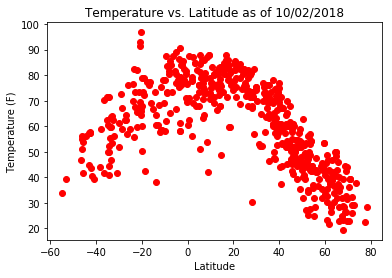

In [7]:
plt.scatter(lats,temps,marker="o",color="red")
plt.title(f'Temperature vs. Latitude as of {datetime.strftime("%m/%d/%Y")}')
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

plt.savefig("output_data/temperature.png")

## Humidity Analysis

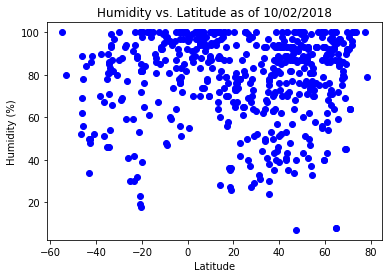

In [8]:
plt.scatter(lats,humidities,marker="o",color="blue")
plt.title(f'Humidity vs. Latitude as of {datetime.strftime("%m/%d/%Y")}')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("output_data/humidity.png")

## Cloudiness Analysis

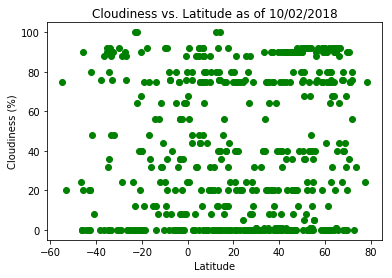

In [9]:
plt.scatter(lats,clouds,marker="o",color="green")
plt.title(f'Cloudiness vs. Latitude as of {datetime.strftime("%m/%d/%Y")}')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("output_data/cloudiness.png")

## Wind Speed Analysis

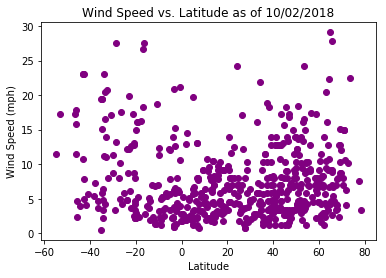

In [10]:
plt.scatter(lats,wind_speeds,marker="o",color="purple")
plt.title(f'Wind Speed vs. Latitude as of {datetime.strftime("%m/%d/%Y")}')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("output_data/wind_speed.png")

## Save Full Dataset

In [11]:
weather_df = pd.DataFrame({"City":final_cities,
                           "Latitude":lats,
                            "Temperature":temps,
                            "Humidity":humidities,
                            "Cloudiness":clouds,
                            "Wind Speed":wind_speeds})

weather_df.head()

,City,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,esfarayen,37.08,60.80,63,75,1.95
1,kahului,20.89,82.02,65,40,13.87
2,rikitea,-23.12,67.58,100,100,19.84
3,lander,42.83,60.06,41,1,10.78
4,puerto ayora,-0.74,71.00,100,8,10.56


In [12]:
weather_df.to_csv(output_data_file)